In [51]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

%matplotlib inline

In [52]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file into a DataFrame
with open('filtered_tweets.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)  # Transpose to set tweets as rows

df


,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,geo
0,{'media_keys': ['13_1711381001983741954']},5383942,2023-10-09T14:00:24.000Z,[1711381099799028159],"{'annotations': [{'end': 22, 'normalized_text'...",1711381099799028159,en,"{'bookmark_count': 0, 'impression_count': 3175...","We’re live at #HLTH2023 connecting, engaging, ...",GSK,NaN
1,NaN,5383942,2023-05-27T14:30:01.000Z,[1662466188142673920],"{'annotations': [{'end': 51, 'normalized_text'...",1662466188142673920,en,"{'bookmark_count': 0, 'impression_count': 4304...",Let’s act to improve outcomes for people with ...,GSK,NaN
2,{'media_keys': ['3_1665803091138998272']},5383942,2023-06-05T19:29:41.000Z,[1665803093886263297],"{'annotations': [{'end': 10, 'normalized_text'...",1665803093886263297,en,"{'bookmark_count': 0, 'impression_count': 2815...","Lynn Baxter, SVP of our HIV company @ViiVHC, s...",GSK,NaN
3,{'media_keys': ['13_1728383032170577920']},5383942,2023-11-25T12:00:07.000Z,[1728383058347270518],"{'hashtags': [{'end': 120, 'start': 106, 'tag'...",1728383058347270518,en,"{'bookmark_count': 1, 'impression_count': 4023...",Adult vaccination can help to reduce morbidity...,GSK,NaN
4,NaN,5383942,2023-08-09T11:52:18.000Z,[1689243202853781504],{'urls': [{'display_url': 'gsk.com/en-gb/behin...,1689243202853781504,en,"{'bookmark_count': 0, 'impression_count': 3864...",We produced and delivered 500 million vaccines...,GSK,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2221,NaN,67342845,2023-12-13T14:10:41.000Z,[1734938898575282625],"{'annotations': [{'end': 2, 'normalized_text':...",1734938898575282625,en,"{'bookmark_count': 1, 'impression_count': 692,...","SSE's Chief Executive, Alistair Phillips-Davie...",SSE,NaN
2222,NaN,67342845,2023-08-15T12:44:00.000Z,[1691430538676998144],NaN,1691430538676998144,en,"{'bookmark_count': 0, 'impression_count': 1508...",We recently updated our family leave policies....,SSE,NaN
2223,{'media_keys': ['3_1463130939249340418']},67342845,2023-08-23T14:53:00.000Z,[1694362105045004544],"{'annotations': [{'end': 18, 'normalized_text'...",1694362105045004544,en,"{'bookmark_count': 0, 'impression_count': 897,...","In 2020, SSE Energy Services was acquired by @...",SSE,NaN
2224,NaN,67342845,2023-11-02T07:48:00.000Z,[1719984688624779268],NaN,1719984688624779268,en,"{'bookmark_count': 0, 'impression_count': 1817...",We're accelerating progress toward a better wo...,SSE,NaN


In [54]:
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    attachments = row['attachments']
    if type(attachments) == dict:
        for key, value in attachments.items():
            # Check if column with key name already exists
            if key in df.columns:
                # Update existing column value
                df.at[index, f'attachments_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'attachments_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
    entities = row['entities']
    if type(entities) == dict:
        for key, value in entities.items():
            if key in df.columns:
                # Update existing column value
                df.at[index, f'entities_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'entities_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
    public_metrics = row['public_metrics']
    if type(public_metrics) == dict:
        for key, value in public_metrics.items():
            if key in df.columns:
                # Update existing column value
                df.at[index, f'public_metrics_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'public_metrics_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])        

In [55]:
df.columns

Index(['attachments', 'author_id', 'created_at', 'edit_history_tweet_ids',
       'entities', 'id', 'lang', 'public_metrics', 'text', 'username', 'geo',
       'attachments_media_keys', 'entities_annotations', 'entities_hashtags',
       'entities_urls', 'public_metrics_bookmark_count',
       'public_metrics_impression_count', 'public_metrics_like_count',
       'public_metrics_quote_count', 'public_metrics_reply_count',
       'public_metrics_retweet_count', 'entities_mentions',
       'attachments_poll_ids', 'entities_cashtags'],
      dtype='object')

In [56]:
df.drop(columns=['attachments', 'entities', 'public_metrics'], inplace=True)

In [57]:
df.columns

Index(['author_id', 'created_at', 'edit_history_tweet_ids', 'id', 'lang',
       'text', 'username', 'geo', 'attachments_media_keys',
       'entities_annotations', 'entities_hashtags', 'entities_urls',
       'public_metrics_bookmark_count', 'public_metrics_impression_count',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count',
       'entities_mentions', 'attachments_poll_ids', 'entities_cashtags'],
      dtype='object')

In [58]:
df['entities_annotations']

0                                                    None
1                                                    None
2                                                    None
3                                                    None
4                                                    None
                              ...                        
2221                                                 None
2222                                                 None
2223    [{'end': 18, 'normalized_text': 'SSE Energy', ...
2224                                                 None
2225                                                 None
Name: entities_annotations, Length: 2226, dtype: object

In [59]:
for index, row in df.iterrows():
    annotations = row['entities_annotations']
    if annotations:
        for d in annotations:
            for key, value in d.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'annotations_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'annotations_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])

In [60]:
df.head()

,author_id,created_at,edit_history_tweet_ids,id,lang,text,username,geo,attachments_media_keys,entities_annotations,...,public_metrics_reply_count,public_metrics_retweet_count,entities_mentions,attachments_poll_ids,entities_cashtags,annotations_end,annotations_normalized_text,annotations_probability,annotations_start,annotations_type
0,5383942,2023-10-09T14:00:24.000Z,[1711381099799028159],1711381099799028159,en,"We’re live at #HLTH2023 connecting, engaging, ...",GSK,NaN,None,None,...,NaN,NaN,None,None,None,NaN,None,NaN,NaN,None
1,5383942,2023-05-27T14:30:01.000Z,[1662466188142673920],1662466188142673920,en,Let’s act to improve outcomes for people with ...,GSK,NaN,None,None,...,NaN,NaN,None,None,None,NaN,None,NaN,NaN,None
2,5383942,2023-06-05T19:29:41.000Z,[1665803093886263297],1665803093886263297,en,"Lynn Baxter, SVP of our HIV company @ViiVHC, s...",GSK,NaN,None,None,...,NaN,NaN,None,None,None,NaN,None,NaN,NaN,None
3,5383942,2023-11-25T12:00:07.000Z,[1728383058347270518],1728383058347270518,en,Adult vaccination can help to reduce morbidity...,GSK,NaN,None,None,...,NaN,NaN,None,None,None,NaN,None,NaN,NaN,None
4,5383942,2023-08-09T11:52:18.000Z,[1689243202853781504],1689243202853781504,en,We produced and delivered 500 million vaccines...,GSK,NaN,None,None,...,NaN,NaN,None,None,None,NaN,None,NaN,NaN,None


In [61]:
for index, row in df.iterrows():
    annotations = row['entities_urls']
    if annotations:
        for d in annotations:
            for key, value in d.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'urls_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'urls_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])

In [62]:
df.head()

,author_id,created_at,edit_history_tweet_ids,id,lang,text,username,geo,attachments_media_keys,entities_annotations,...,annotations_normalized_text,annotations_probability,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_media_key,urls_start,urls_url
0,5383942,2023-10-09T14:00:24.000Z,[1711381099799028159],1711381099799028159,en,"We’re live at #HLTH2023 connecting, engaging, ...",GSK,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,None,NaN,None
1,5383942,2023-05-27T14:30:01.000Z,[1662466188142673920],1662466188142673920,en,Let’s act to improve outcomes for people with ...,GSK,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,None,NaN,None
2,5383942,2023-06-05T19:29:41.000Z,[1665803093886263297],1665803093886263297,en,"Lynn Baxter, SVP of our HIV company @ViiVHC, s...",GSK,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,None,NaN,None
3,5383942,2023-11-25T12:00:07.000Z,[1728383058347270518],1728383058347270518,en,Adult vaccination can help to reduce morbidity...,GSK,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,None,NaN,None
4,5383942,2023-08-09T11:52:18.000Z,[1689243202853781504],1689243202853781504,en,We produced and delivered 500 million vaccines...,GSK,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,None,NaN,None


In [63]:
min(df.created_at)

'2023-01-01T09:00:07.000Z'

In [64]:
max(df.created_at)

'2023-12-31T10:40:42.000Z'

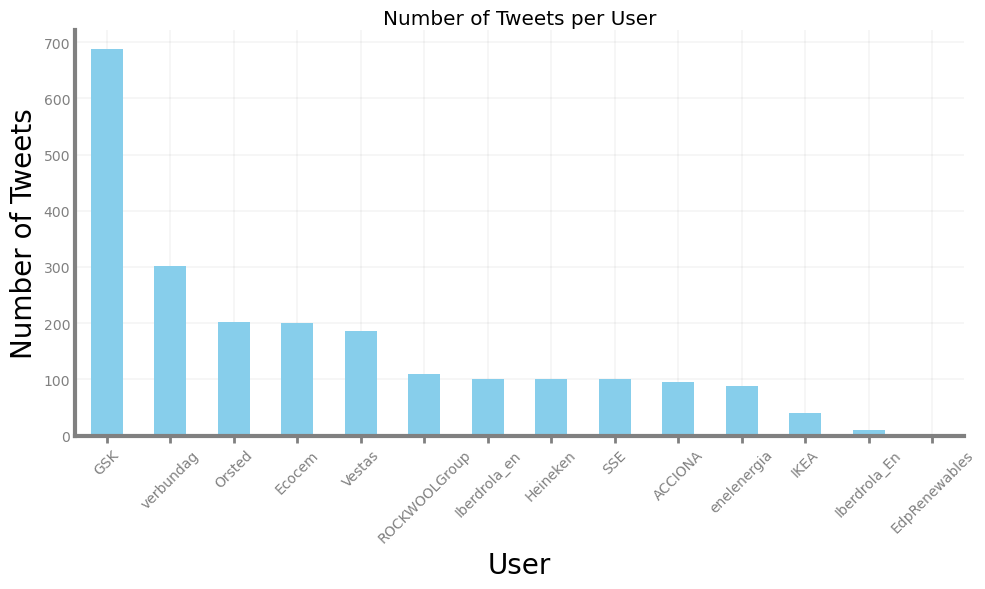

username
GSK              688
verbundag        302
Orsted           203
Ecocem           201
Vestas           187
ROCKWOOLGroup    109
Iberdrola_en     101
Heineken         100
SSE              100
ACCIONA           95
enelenergia       88
IKEA              41
Iberdrola_En      10
EdpRenewables      1
Name: count, dtype: int64


In [65]:
# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(tweet_counts)

In [66]:
df['created_at']

0       2023-10-09T14:00:24.000Z
1       2023-05-27T14:30:01.000Z
2       2023-06-05T19:29:41.000Z
3       2023-11-25T12:00:07.000Z
4       2023-08-09T11:52:18.000Z
                  ...           
2221    2023-12-13T14:10:41.000Z
2222    2023-08-15T12:44:00.000Z
2223    2023-08-23T14:53:00.000Z
2224    2023-11-02T07:48:00.000Z
2225    2023-12-05T08:32:54.000Z
Name: created_at, Length: 2226, dtype: object

In [68]:
df['date'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [90]:
# 2. Number of tweets per day/week/month
df['created_at'] = pd.to_datetime(df['created_at'])
daily_tweet_counts = df.groupby(df['created_at'].dt.date).size()
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()
monthly_tweet_counts = df.groupby(df['created_at'].dt.month).size()

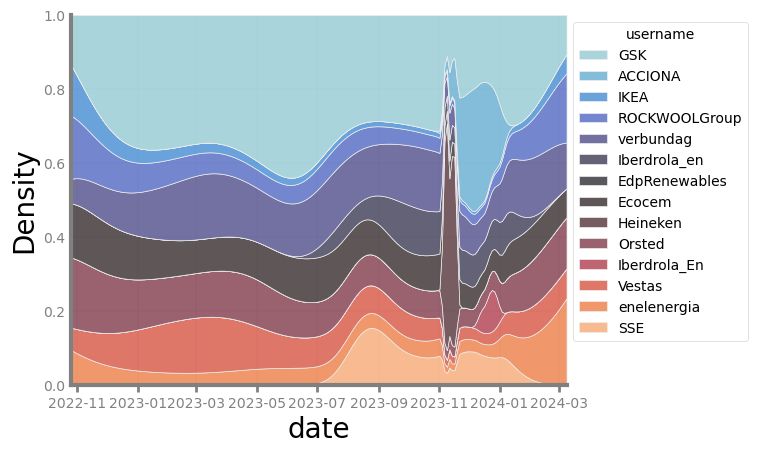

In [37]:
#number of tweets timeseries
sns.set_palette("icefire", n_colors = len(df.username.unique()))
ax = sns.kdeplot(data=df, x="date", hue="username", multiple="fill")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


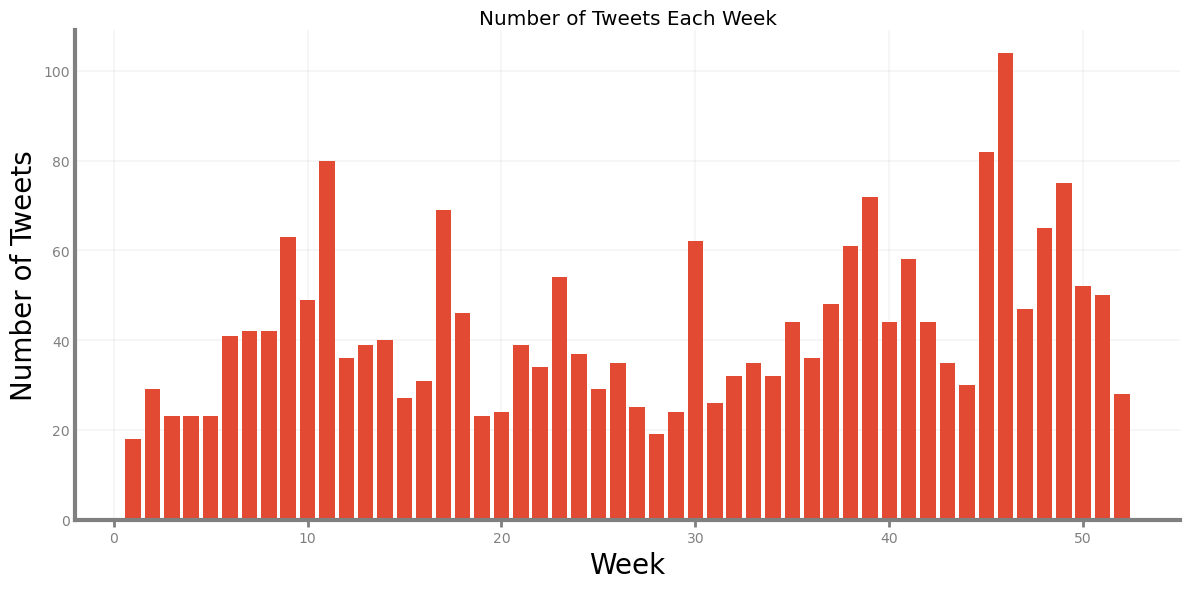

In [97]:
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()

# Reset index to make 'week' and 'username' as columns
weekly_tweet_counts_df = weekly_tweet_counts.reset_index()
weekly_tweet_counts_df = weekly_tweet_counts_df.rename(columns={0: 'count'})

# Plot using Seaborn
plt.figure(figsize=(12, 6))
plt.bar(x = weekly_tweet_counts_df['week'], height = weekly_tweet_counts_df['count'])
plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
monthly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().month).size()

# Reset index to make 'week' and 'username' as columns
monthly_tweet_counts_df = monthly_tweet_counts.reset_index()
monthly_tweet_counts_df = monthly_tweet_counts_df.rename(columns={0: 'count'})

monthly_tweet_counts

# # Plot using Seaborn
# plt.figure(figsize=(12, 6))
# plt.bar(x = monthly_tweet_counts_df['month'], height = monthly_tweet_counts_df['count'])
# plt.title('Number of Tweets Each Month')
# plt.xlabel('Month')
# plt.ylabel('Number of Tweets')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

AttributeError: 'DataFrame' object has no attribute 'month'